In [7]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import numpy

A trend is a long-term increase or decrease in the level of the time series.

1. Deterministic Trends: These are trends that consistently increase or decrease.
1. Stochastic Trends: These are trends that increase and decrease inconsistently.

Trends in terms of scopes of observations:
1. Global Trends: These are trends that apply to the whole time series.
1. Local Trends: These are trends that apply to parts or subsequences of a time series

In [4]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('datasets/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

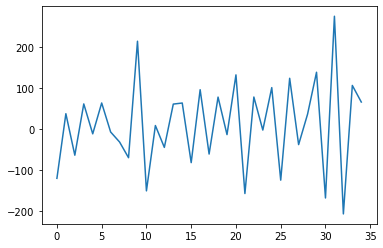

In [6]:
# Detrend a time series using differencing
# This works for linear trend. 
# If the trend is quadratic, then a difference of the already-difference dataset can be taken

X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i-1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

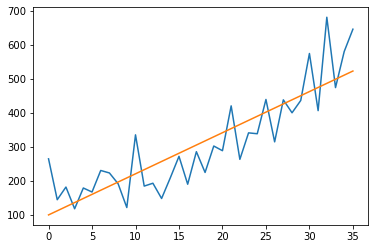

In [8]:
# Detrend a time series using linear model

X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)

# Calculate Trend
trend = model.predict(X)

# Plot Trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()

# Detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]

# Plot Detrended
pyplot.plot(detrended)
pyplot.show()

A trend can be removed from your time series data (and data in the future) as a
data preparation and cleaning exercise. This is common when using statistical methods for time
series forecasting, but does not always improve results when using machine learning models.
Alternately, a trend can be added, either directly or as a summary, as a new input variable to
the supervised learning problem to predict the output variable